# timeline_plot2
Use the Python3 kernel

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df.plot(kind='bar')
# plt.legend(["AAA", "BBB"]);

In [5]:
# from https://healthyalgorithms.com/2014/11/06/dates-and-times-in-python-average-of-two-dates-with-pandas/

# midpoint of two date columns
df = pd.DataFrame({'a': ['5/1/2012 0:00', '4/1/2014 0:00'],
                   'b': ['4/1/2014 0:00', 'unknown']})
 
# make time data into Timestamp format
def try_totime(t):
    try:
        return pd.Timestamp(t)
    except:
        return np.nan
     
df['start'] = df.a.map(try_totime)
df['end'] = df.b.map(try_totime)
 
# generate midpoint time
# harder than it would seem...
df['time'] = df.start + (df.end - df.start)/2
 
df

,a,b,start,end,time
0,5/1/2012 0:00,4/1/2014 0:00,2012-05-01,2014-04-01,2013-04-16
1,4/1/2014 0:00,unknown,2014-04-01,NaT,NaT


In [6]:
df = pd.read_csv('damageplot.csv', parse_dates=True)
df['start'] = df.start_date.map(try_totime)
df['end'] = df.end_date.map(try_totime)
 
# generate midpoint time
df['time'] = df.start + (df.end - df.start)/2
df

,start_date,end_date,total_palms,damage0,damage1,damage2,damage3,damage4,start,end,time
0,2020-09-30,2020-10-22,57666,46585,6950,2549,1063,519,2020-09-30,2020-10-22,2020-10-11 00:00:00
1,2020-12-11,2020-12-24,76088,59695,9122,4461,2341,469,2020-12-11,2020-12-24,2020-12-17 12:00:00
2,2021-03-03,2021-03-18,67674,52202,8855,4058,2268,291,2021-03-03,2021-03-18,2021-03-10 12:00:00
3,2021-05-07,2021-05-20,17982,14396,2259,871,402,54,2021-05-07,2021-05-20,2021-05-13 12:00:00
4,2021-08-23,2021-09-03,12873,10131,1568,683,422,69,2021-08-23,2021-09-03,2021-08-28 12:00:00


In [7]:
df['damage0pct'] = 100 * df['damage0'] / df['total_palms']
df['damage1pct'] = 100 * df['damage1'] / df['total_palms']
df['damage2pct'] = 100 * df['damage2'] / df['total_palms']
df['damage3pct'] = 100 * df['damage3'] / df['total_palms']
df['damage4pct'] = 100 * df['damage4'] / df['total_palms']
df

,start_date,end_date,total_palms,damage0,damage1,damage2,damage3,damage4,start,end,time,damage0pct,damage1pct,damage2pct,damage3pct,damage4pct
0,2020-09-30,2020-10-22,57666,46585,6950,2549,1063,519,2020-09-30,2020-10-22,2020-10-11 00:00:00,80.784171,12.052162,4.420282,1.843374,0.900010
1,2020-12-11,2020-12-24,76088,59695,9122,4461,2341,469,2020-12-11,2020-12-24,2020-12-17 12:00:00,78.455210,11.988750,5.862948,3.076701,0.616392
2,2021-03-03,2021-03-18,67674,52202,8855,4058,2268,291,2021-03-03,2021-03-18,2021-03-10 12:00:00,77.137453,13.084789,5.996394,3.351361,0.430003
3,2021-05-07,2021-05-20,17982,14396,2259,871,402,54,2021-05-07,2021-05-20,2021-05-13 12:00:00,80.057836,12.562563,4.843733,2.235569,0.300300
4,2021-08-23,2021-09-03,12873,10131,1568,683,422,69,2021-08-23,2021-09-03,2021-08-28 12:00:00,78.699604,12.180533,5.305679,3.278179,0.536006


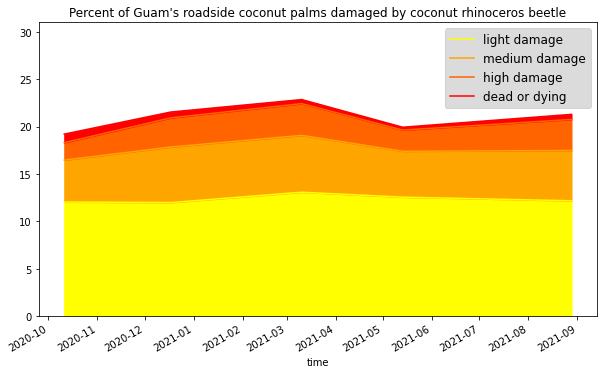

In [8]:
p = df.plot(
    x='time', 
    y=['damage1pct','damage2pct','damage3pct','damage4pct'], 
    ylim=(0,31),
    kind='area', 
    color=('#ffff00', '#ffa500', '#ff6400', '#ff0000'), 
    title="Percent of Guam's roadside coconut palms damaged by coconut rhinoceros beetle",
    figsize=(10,6))

p.legend(
    labels=['light damage','medium damage', 'high damage','dead or dying'], 
    loc='upper right', 
    facecolor='lightgray',
    fontsize='large')
p;

In [9]:
p.figure.savefig('timeline.pdf')
p.figure.savefig('timeline.png')
p.figure.savefig('timeline.svg')